In [1]:
from annotator import Annotator
from graph_edit_distance import Label_Metrics
import graphs as gr
import networkx as nx
import numpy as np
import pandas as pd

annotator1 = Annotator('annotator1', "annotations-TBikaun.json")
annotator2 = Annotator('annotator2', "annotations-ziyu.zhao.json")
annotator3 = Annotator('annotator3', "annotations-danielsantosa.json")
annotator4 = Annotator('annotator4', "annotations-mhodki.json")
annotator5 = Annotator('annotator5', "annotations-mstewartuwa.json")
annotator6 = Annotator('annotator6', "annotations-caitlinwoods.json")
annotator7 = Annotator('annotator7', "annotations-Tim.json")
label = Label_Metrics(annotator1, annotator2, annotator3, annotator6)

In [2]:
overall_table = label.get_accumulated_table()

percentage_same = 0.6
result_df = label.create_df_same_different(percentage_same, overall_table)
# pd.set_option('display.max_rows', None)
pivoted_table = label.pivot_dataframe(result_df)
annotator_nodes = set(pivoted_table['annotator_id'])
annotator_graphs = Label_Metrics.create_annotator_graphs(pivoted_table, annotator_nodes)
pairwise_ged = Label_Metrics.calculate_pairwise_ged(annotator_graphs, annotator_nodes)
print("Graph Edit Distance between annotators:")
print(pairwise_ged)
pairwise_reliability = Label_Metrics.calculate_pairwise_reliability(pairwise_ged, annotator_graphs)
print("Pairwise Reliability:")
print(pairwise_reliability)

overall_reliability = Label_Metrics.calculate_overall_reliability(pairwise_reliability)

Creating a DataFrame with 259 rows with same labels and 174 rows with different labels
Graph Edit Distance between annotators:
{('daniel', 'ziyu'): 188.0, ('daniel', 'tim'): 193.0, ('ziyu', 'tim'): 193.0}
Pairwise Reliability:
{('daniel', 'ziyu'): 0.6107660455486543, ('daniel', 'tim'): 0.6004140786749482, ('ziyu', 'tim'): 0.614}


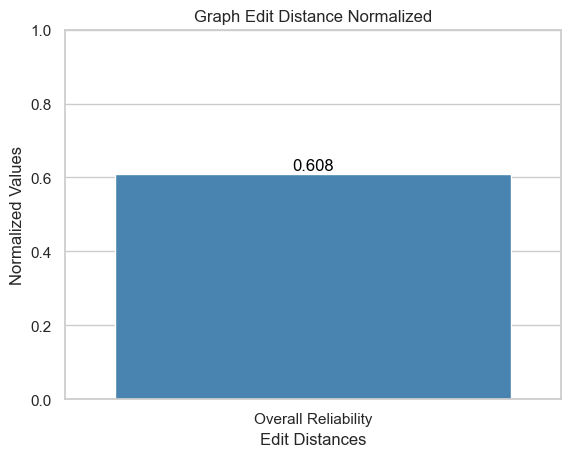

In [4]:
gr.create_bar_chart(overall_reliability, "Edit Distances", "Normalized Values","Graph Edit Distance Normalized Values")